Ноздрова В. С.

Группа ИУ5-61Б

Вариант 15

# Рубежный контроль №2

Для заданного набора данных (по Вашему варианту) постройте модели классификации или регрессии (в зависимости от конкретной задачи, рассматриваемой в наборе данных). Для построения моделей используйте методы 1 и 2 (по варианту для Вашей группы). Оцените качество моделей на основе подходящих метрик качества (не менее двух метрик). Какие метрики качества Вы использовали и почему? Какие выводы Вы можете сделать о качестве построенных моделей? Для построения моделей необходимо выполнить требуемую предобработку данных: заполнение пропусков, кодирование категориальных признаков, и т.д.

Используемый набор данных: [U.S. Education Datasets: Unification Project (states_all_extended.csv)](https://www.kaggle.com/datasets/noriuk/us-education-datasets-unification-project?resource=download)

Методы по варианту группы:
+ Линейная/логистическая регрессия
+ Случайный лес
___

## Загрузка данных

Набор данных содержит следующие колонки:
+ PRIMARY_KEY - комбинация года и штата
+ YEAR - год
+ STATE - штат
+ ENROLL - количество учащихся в штате по данным U.S. Census Bureau
+ TOTAL_REVENUE - общий доход
+ FEDERAL_REVENUE - федеральный доход
+ STATE_REVENUE - доход штата
+ LOCAL_REVENUE - доход местного правительства
+ TOTAL_EXPENDITURE - общий расход
+ INSTRUCTION_EXPENDITURE - расходы на обучение
+ SUPPORT_SERVICES_EXPENDITURE - расходы на вспомогательные услуги
+ CAPITAL_OUTLAY_EXPENDITURE - капитальные расходы
+ OTHER_EXPENDITURE - другие расходы

+ A_A_A - общее количество учащихся по данным NCES
+ G01_A_A - G12_A_A - количество учащихся по годам обучения
+ KG_A_A - количество воспитанников старших групп детских садов
+ PK_A_A - количество воспитанников младших групп детских садов
+ G01-G08_A_A - общее количество учащихся 1-8 классов
+ G01_AM_F - PK_WH_M - количество учащихся по ступеням образования, расовой принадлежности и полу
+ G04_A_A_READING - средний балл по чтению среди всех учащихся 4 класса
+ G04_A_A_MATHEMATICS - средний балл по математике среди всех учащихся 4 класса
+ G04_A_M_READING - средний балл по чтению среди мальчиков 4 класса
+ G04_A_M_MATHEMATICS - средний балл по математике среди мальчиков 4 класса
+ G04_A_F_READING - средний балл по чтению среди девочек 4 класса
+ G04_A_F_MATHEMATICS - средний балл по математике среди девочек 4 класса
+ G04_WH_A_READING - G04_TR_A_MATHEMATICS - средний балл среди всех учащихся 4 класса с разделением по расовой принадлежности

+ остальные колонки содержат аналогичную информацию по тестам среди учеников 8 классов

In [1]:
# Импорт библиотек
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, median_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка датасета
data = pd.read_csv('states_all_extended.csv')

In [2]:
# Первые 5 строк датасета
data.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,G08_HI_A_READING,G08_HI_A_MATHEMATICS,G08_AS_A_READING,G08_AS_A_MATHEMATICS,G08_AM_A_READING,G08_AM_A_MATHEMATICS,G08_HP_A_READING,G08_HP_A_MATHEMATICS,G08_TR_A_READING,G08_TR_A_MATHEMATICS
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Размер датасета
print('Строк: {}'.format(data.shape[0]))
print('Колонок: {}'.format(data.shape[1]))

Строк: 1715
Колонок: 266


In [4]:
# Типы колонок
data.dtypes

PRIMARY_KEY              object
STATE                    object
YEAR                      int64
ENROLL                  float64
TOTAL_REVENUE           float64
                         ...   
G08_AM_A_MATHEMATICS    float64
G08_HP_A_READING        float64
G08_HP_A_MATHEMATICS    float64
G08_TR_A_READING        float64
G08_TR_A_MATHEMATICS    float64
Length: 266, dtype: object

## Обработка пропусков и кодирование признаков

Проверим количество пропусков в колонках:

In [5]:
#Типы колонок и количество пропусков в них
print('{:30}  {:10} {}'.format('Колонка', 'Тип', 'Количество пустых значений'))
mis_cols = []
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений 
    temp_null_count = data[data[col].isnull()].shape[0]
    if temp_null_count>0:
        temp_perc = round((temp_null_count / data.shape[0]) * 100.0, 2)
        if temp_perc > 76:
            mis_cols.append(col)
        print('{:30}  {:10} {} ({}%)'.format(col, str(data[col].dtype), temp_null_count, temp_perc))

Колонка                         Тип        Количество пустых значений
ENROLL                          float64    491 (28.63%)
TOTAL_REVENUE                   float64    440 (25.66%)
FEDERAL_REVENUE                 float64    440 (25.66%)
STATE_REVENUE                   float64    440 (25.66%)
LOCAL_REVENUE                   float64    440 (25.66%)
TOTAL_EXPENDITURE               float64    440 (25.66%)
INSTRUCTION_EXPENDITURE         float64    440 (25.66%)
SUPPORT_SERVICES_EXPENDITURE    float64    440 (25.66%)
OTHER_EXPENDITURE               float64    491 (28.63%)
CAPITAL_OUTLAY_EXPENDITURE      float64    440 (25.66%)
A_A_A                           float64    83 (4.84%)
G01_A_A                         float64    83 (4.84%)
G02_A_A                         float64    83 (4.84%)
G03_A_A                         float64    83 (4.84%)
G04_A_A                         float64    83 (4.84%)
G05_A_A                         float64    83 (4.84%)
G06_A_A                         float64    83 

G04_WH_A_MATHEMATICS            float64    1450 (84.55%)
G04_BL_A_READING                float64    1489 (86.82%)
G04_BL_A_MATHEMATICS            float64    1486 (86.65%)
G04_HI_A_READING                float64    1465 (85.42%)
G04_HI_A_MATHEMATICS            float64    1465 (85.42%)
G04_AS_A_READING                float64    1551 (90.44%)
G04_AS_A_MATHEMATICS            float64    1547 (90.2%)
G04_AM_A_READING                float64    1651 (96.27%)
G04_AM_A_MATHEMATICS            float64    1652 (96.33%)
G04_HP_A_READING                float64    1699 (99.07%)
G04_HP_A_MATHEMATICS            float64    1700 (99.13%)
G04_TR_A_READING                float64    1532 (89.33%)
G04_TR_A_MATHEMATICS            float64    1532 (89.33%)
G08_A_A_READING                 float64    1153 (67.23%)
G08_A_A_MATHEMATICS             float64    1113 (64.9%)
G08_A_M_READING                 float64    1153 (67.23%)
G08_A_M_MATHEMATICS             float64    1113 (64.9%)
G08_A_F_READING                 fl

В колонках, содержащих информацию о количестве учащихся по ступеням образования, расовой принадлежности и полу и о результатах тестов с аналогичным разделением, имеется от 76% до 99% пропусков, поэтому эти колонки нецелесообразно использовать для построения модели и можно их удалить.

In [6]:
data_new = data.drop(axis=1, columns=mis_cols).copy()
print('{:30}  {:10} {}'.format('Колонка', 'Тип', 'Количество пустых значений'))
mis_rows = []
for col in data_new.columns:
    # Количество пустых значений 
    temp_null_count = data_new[data_new[col].isnull()].shape[0]
    if temp_null_count>0:
        temp_perc = round((temp_null_count / data_new.shape[0]) * 100.0, 2)
        if temp_perc > 0:
            mis_rows.append(col)
        print('{:30}  {:10} {} ({}%)'.format(col, str(data_new[col].dtype), temp_null_count, temp_perc))

Колонка                         Тип        Количество пустых значений
ENROLL                          float64    491 (28.63%)
TOTAL_REVENUE                   float64    440 (25.66%)
FEDERAL_REVENUE                 float64    440 (25.66%)
STATE_REVENUE                   float64    440 (25.66%)
LOCAL_REVENUE                   float64    440 (25.66%)
TOTAL_EXPENDITURE               float64    440 (25.66%)
INSTRUCTION_EXPENDITURE         float64    440 (25.66%)
SUPPORT_SERVICES_EXPENDITURE    float64    440 (25.66%)
OTHER_EXPENDITURE               float64    491 (28.63%)
CAPITAL_OUTLAY_EXPENDITURE      float64    440 (25.66%)
A_A_A                           float64    83 (4.84%)
G01_A_A                         float64    83 (4.84%)
G02_A_A                         float64    83 (4.84%)
G03_A_A                         float64    83 (4.84%)
G04_A_A                         float64    83 (4.84%)
G05_A_A                         float64    83 (4.84%)
G06_A_A                         float64    83 

Колонки с результатами тестов содержат до 67% пропусков, но т.к. они являются целевыми, удалять их нельзя. Поэтому удалим строки с пропущенными значениями.

In [7]:
data_new = data_new.dropna(axis=0, subset=mis_rows).copy()
print(data_new.shape)

(355, 42)


Таким образом, получен фрагмент датасета без пропусков, содержащий 355 строк, что допускается по условию задачи. Также в датасете имеется один категориальный признак, требующий кодирования, - колонка STATE.

In [8]:
# Уникальные значения колонки STATE
data_new['STATE'].unique()

array(['ALABAMA', 'ALASKA', 'ARIZONA', 'ARKANSAS', 'CALIFORNIA',
       'COLORADO', 'CONNECTICUT', 'DELAWARE', 'DISTRICT_OF_COLUMBIA',
       'FLORIDA', 'GEORGIA', 'HAWAII', 'IDAHO', 'ILLINOIS', 'INDIANA',
       'IOWA', 'KANSAS', 'KENTUCKY', 'LOUISIANA', 'MAINE', 'MARYLAND',
       'MASSACHUSETTS', 'MICHIGAN', 'MINNESOTA', 'MISSISSIPPI',
       'MISSOURI', 'MONTANA', 'NEBRASKA', 'NEVADA', 'NEW_HAMPSHIRE',
       'NEW_JERSEY', 'NEW_MEXICO', 'NEW_YORK', 'NORTH_CAROLINA',
       'NORTH_DAKOTA', 'OHIO', 'OKLAHOMA', 'OREGON', 'PENNSYLVANIA',
       'RHODE_ISLAND', 'SOUTH_CAROLINA', 'SOUTH_DAKOTA', 'TENNESSEE',
       'TEXAS', 'UTAH', 'VERMONT', 'VIRGINIA', 'WASHINGTON',
       'WEST_VIRGINIA', 'WISCONSIN', 'WYOMING'], dtype=object)

In [9]:
# Кодирование значений колонки STATE числовыми значениями
le = LabelEncoder()
data_new['STATE'] = le.fit_transform(data_new['STATE'])

## Построение моделей

Будем исследовать зависимость оценок в 8 классах от трат на образование, поэтому удалим лишние столбцы, а также введем столбец со средним баллом за оба теста.

Для оценки качества моделей будем использовать следующие метрики:
+ Средняя квадратичная ошибка (MSE)
+ Медианная абсолютная ошибка (MedAE)

In [10]:
del_cols = ['PRIMARY_KEY','A_A_A', 'G09_A_A', 'G10_A_A','G11_A_A','G12_A_A','G09-G12_A_A', 'G04_A_A_READING', 'G04_A_A_MATHEMATICS', 'G04_A_M_READING','G04_A_M_MATHEMATICS','G04_A_F_READING','G04_A_F_MATHEMATICS','G08_A_M_READING','G08_A_M_MATHEMATICS','G08_A_F_READING','G08_A_F_MATHEMATICS','G08_A_A_READING', 'G08_A_A_MATHEMATICS', 'PK_A_A', 'KG_A_A','G01_A_A', 'G02_A_A', 'G03_A_A', 'G04_A_A', 'G05_A_A','G06_A_A', 'G07_A_A']
data_new['G08_TEST'] = data_new.apply (lambda row: (row['G08_A_A_READING']+row['G08_A_A_MATHEMATICS'])/2, axis=1)
data_new = data_new.drop(axis=1, columns=del_cols).copy()

<AxesSubplot:>

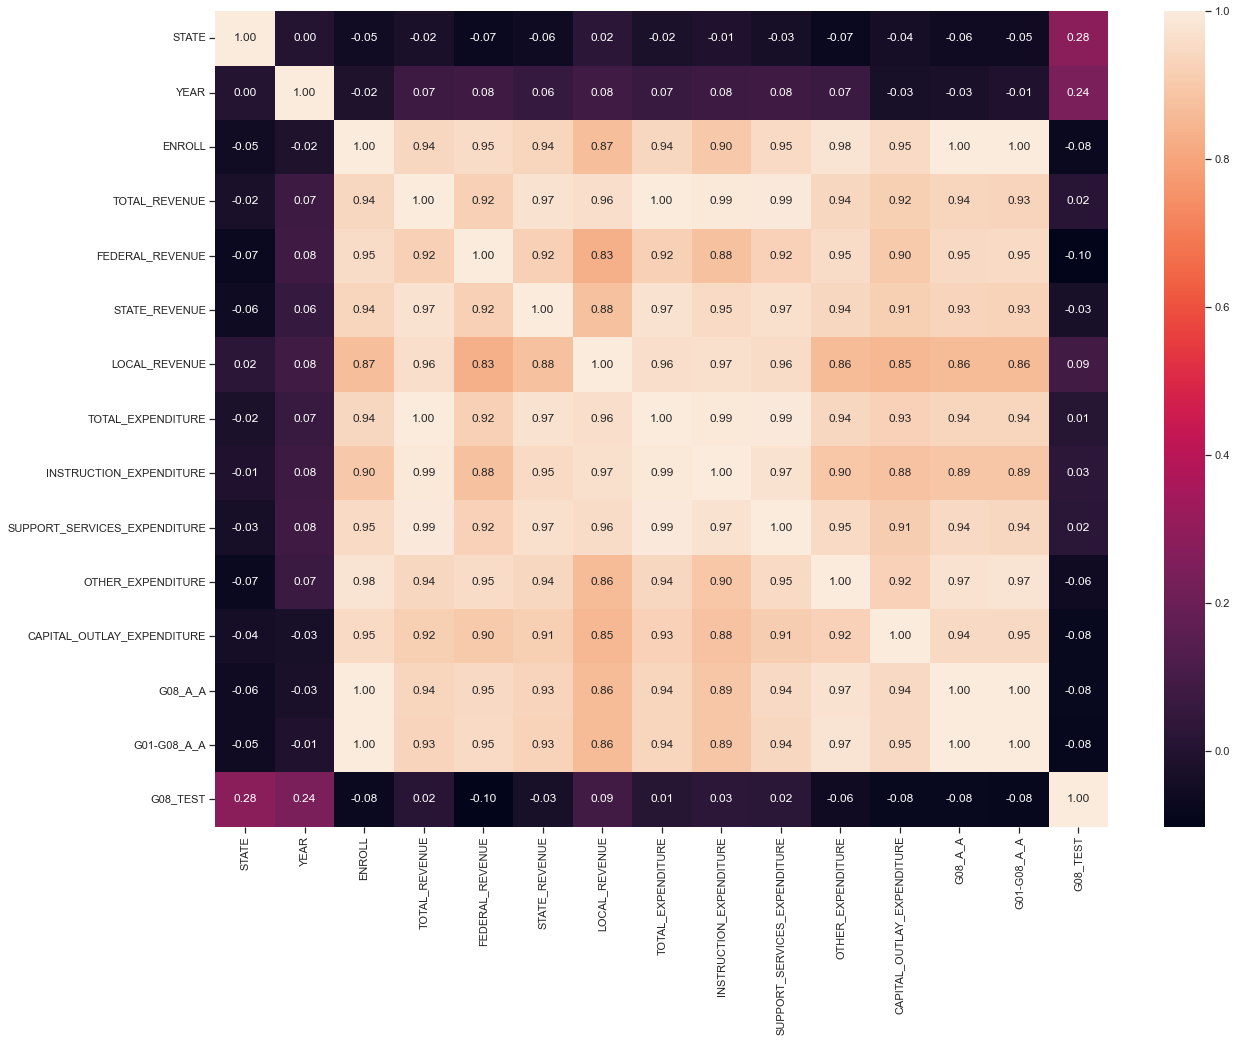

In [11]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(20,15))
sns.heatmap(data_new.corr(), ax=ax, annot=True, fmt='.2f')

In [12]:
# Разделение данных на обучающую и тестовую выборки
train_cols = data_new.columns.difference(['G08_TEST'])
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(
    data_new[train_cols], data_new['G08_TEST'], test_size=0.3, random_state=1)

In [13]:
# Размер обучающей выборки
data_x_train.shape, data_y_train.shape

((248, 14), (248,))

In [14]:
# Размер тестовой выборки
data_x_test.shape, data_y_test.shape

((107, 14), (107,))

In [15]:
# Линейная регрессия
lr = LinearRegression().fit(data_x_train, data_y_train)
lr_mse = mean_squared_error(data_y_test, lr.predict(data_x_test), squared = True)
lr_medae = median_absolute_error(data_y_test, lr.predict(data_x_test))

In [16]:
# Случайный лес
rf = RandomForestRegressor(random_state=1)
rf.fit(data_x_train, data_y_train)
rf_mse = mean_squared_error(data_y_test, rf.predict(data_x_test), squared = True)
rf_medae = median_absolute_error(data_y_test, rf.predict(data_x_test))

In [17]:
# Вывод метрик
print('{:5} {:>20} {:>20}'.format('','Линейная регрессия', 'Случайный лес'))
print('{:5} {:20} {:20}'.format('MSE', lr_mse, rf_mse))
print('{:5} {:20} {:20}'.format('MedAE', lr_medae, rf_medae))


        Линейная регрессия        Случайный лес
MSE      46.51973688145895    9.797897196261689
MedAE    4.997387605429481    1.704999999999984


Таким образом, ансамблевая модель случайного леса лучше предсказала значения, чем модель линейной регрессии.